In [1]:
from time import sleep, time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
import sys
from BayesianOptimization_master.bayes_opt1 import BayesianOptimization, UtilityFunction
import statistics
from imagerecognitionmodel import main
import csv


    
def ackley(x, y):
    sleep(np.sqrt(x**2 + y**2) / 10)
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def rosenbrock(x, y):
    sleep(np.sqrt(x**2 + y**3) / 10)
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

def rastrigin(x, y):
    sleep((x + y**2 + x*y)/10)
    return 20 + x ** 2 - 10 * np.cos(2 * np.pi * x) + y ** 2 - 10 * np.cos(2 * np.pi * y)

    

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


{'batch_size': 15.43210758780896, 'fc_layer_size': 257.30374135201316, 'kernel_size': 3.2919740074702957, 'learning_rate': -1.9791618267413162, 'num_epochs': 2.6408371211097714, 'num_fc_layers': 1.007066393665032}
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(

/Users/lafayette_bussey/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403210267/work/aten/src/ATen/native/Convolution.cpp:1041.)
  return F.conv2d(input, weight, bias, self.stride,


[1,  2000] loss: 1.673
[1,  4000] loss: 1.321
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced V

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


Accuracy of the network on the 10000 test images: 71 %
{'batch_size': 14.320889727200607, 'fc_layer_size': 85.6122264982468, 'kernel_size': 6.675304040175245, 'learning_rate': -1.6992214948985402, 'num_epochs': 3.6485157535453583, 'num_fc_layers': 1.435085140257346}
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AV

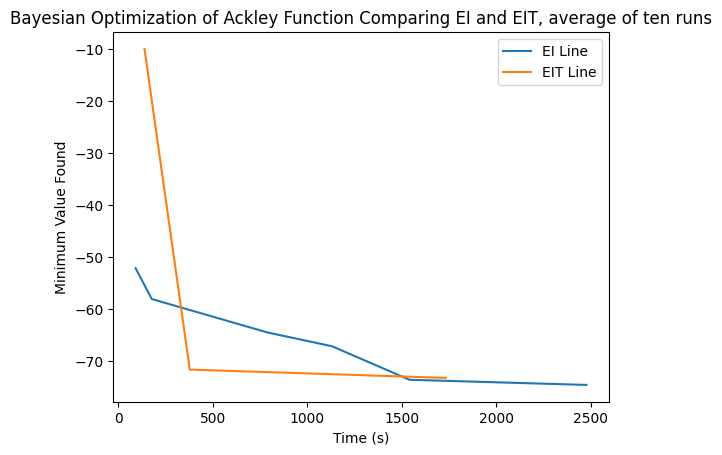

In [2]:
bounds = {'num_epochs': (1, 5), 
          'batch_size': (2, 20),
          'num_fc_layers': (1, 3),
          'learning_rate': (-3.5, -1.5),
          'fc_layer_size': (32, 300),
          'kernel_size': (2,7)}

current_optimizing_fun = lambda num_epochs, batch_size, num_fc_layers, learning_rate, fc_layer_size, kernel_size: main(int(num_epochs), 
                                                                                                                        int(batch_size), 
                                                                                                                        int(num_fc_layers), 
                                                                                                                        10.0 ** learning_rate, 
                                                                                                                        int(fc_layer_size), 
                                                                                                                        int(kernel_size))
# bounds = {'x': (-5,5),
#           'y': (-5,5)}

# current_optimizing_fun = lambda x, y: ackley(int(x), int(y))

ei_max_points_time = [] 
ei_max_points = []       

eit_max_points_time = [] 
eit_max_points = []      

for i in range(1):
    ei_max_points_time.append([]) 
    ei_max_points.append([])        
    eit_max_points_time.append([]) 
    eit_max_points.append([])   

    output = []
    output.append(["EIT:"])
    eit_optimizer = BayesianOptimization(
        f=current_optimizing_fun,
        pbounds=bounds,
        allow_duplicate_points=True,
        time_travel=True
    )

    utility = UtilityFunction(kind="eit", kappa=2.5, xi=0.01)

    max_point = -1 * np.inf
    start_time = time()
    num_points_tested = 0
    while time() - start_time < 3600:
        output.append([])
        num_points_tested += 1
        earliest_t = time()
        next_point_to_probe = eit_optimizer.suggest(utility)
        print(next_point_to_probe)
        before_t = time()
        cost_to_evaluate_eit = before_t - earliest_t
        result = current_optimizing_fun(**next_point_to_probe)
        delta_t = time() - before_t
        was_best = False
        if result > max_point:
            was_best = True
            max_point = result
            eit_max_points[i].append(-1 * max_point)
            eit_max_points_time[i].append(time() - start_time)
            #print(f"Maximum Found: {max_point}")
        eit_optimizer.register(params=next_point_to_probe, target=result,delta_t=delta_t)
        output[num_points_tested].append([num_points_tested, time() - start_time, result, cost_to_evaluate_eit, delta_t, was_best])
    print(f"EIT Total Points Tested: {num_points_tested}")
    offset = num_points_tested + 1
    output.append(["EI:"])
    ei_optimizer = BayesianOptimization(
        f=current_optimizing_fun,
        pbounds=bounds,
        allow_duplicate_points=True,
        time_travel=True
    )

    utility = UtilityFunction(kind="ei", kappa=2.5, xi=0.01)
    max_point = -1 * np.inf

    start_time = time()
    num_points_tested = 0
    while time() - start_time < 3600:
        output.append([])
        num_points_tested += 1
        earliest_t = time()
        next_point_to_probe = ei_optimizer.suggest(utility)
        print(next_point_to_probe)
        before_t = time()
        cost_to_evaluate_eit = before_t - earliest_t
        result = current_optimizing_fun(**next_point_to_probe)
        delta_t = time() - before_t
        was_best = False
        if result > max_point:
            was_best = True
            max_point = result
            ei_max_points[i].append(-1 * max_point)
            ei_max_points_time[i].append(time() - start_time)
            #print(f"Maximum Found: {max_point}")
        ei_optimizer.register(params=next_point_to_probe, target=result,delta_t=delta_t)
        output[num_points_tested + offset].append([num_points_tested, time() - start_time, result, cost_to_evaluate_eit, delta_t,was_best])
    print(f" EI Total Points Tested: {num_points_tested}")

ei_avg_vals = []
ei_avg_times = []
eit_avg_vals = []
eit_avg_times = []
for i in range(100):
    to_avg_vals = []
    to_avg_times = []
    for j in range(len(ei_max_points)):
        if len(ei_max_points[j]) > i:
            to_avg_vals.append(ei_max_points[j][i])
            to_avg_times.append(ei_max_points_time[j][i])
    if len(to_avg_vals) > 0:
        ei_avg_times.append(statistics.mean(to_avg_times))
        #ei_avg_times.append(i)
        ei_avg_vals.append(statistics.mean(to_avg_vals))
    to_avg_vals = []
    to_avg_times = []
    for j in range(len(eit_max_points)):
        if len(eit_max_points[j]) > i:
            to_avg_vals.append(eit_max_points[j][i])
            to_avg_times.append(eit_max_points_time[j][i])
    if len(to_avg_vals) > 0:
        eit_avg_times.append(statistics.mean(to_avg_times))
        #eit_avg_times.append(i)
        eit_avg_vals.append(statistics.mean(to_avg_vals))

# Plot the first line
ei_avg_vals.sort(reverse=True)
ei_avg_times.sort()
plt.plot(ei_avg_times, ei_avg_vals, label='EI Line')

# Plot the second line
eit_avg_vals.sort(reverse=True)
eit_avg_times.sort()
plt.plot(eit_avg_times, eit_avg_vals, label='EIT Line')

# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Minimum Value Found")
plt.title("Bayesian Optimization of Ackley Function Comparing EI and EIT, average of ten runs")

# Add legend
plt.legend()

# Show the plot
plt.show()

with open('GFG', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows(output)



In [3]:
import BayesOptTime

bounds = {'x': (-5, 5), 'y': (-5, 5)}
current_optimizing_fun = lambda x, y: -1 * ackley(x, y)

# utility = UtilityFunction(kind="ei", kappa=2.5, xi=0.0)
max_point = -1 * np.inf
max_points = []
max_points_time = []
start_time = time()
num_points_tested = 0
while time() - start_time < 30:
    num_points_tested += 1
    next_point_to_probe = optimizer.suggest(utility)
    result = current_optimizing_fun(**next_point_to_probe)
    if result > max_point:
        max_point = result
        max_points.append(-1 * max_point)
        max_points_time.append(time() - start_time)
        print(f"Maximum Found: {max_point}")
    optimizer.register(params=next_point_to_probe, target=result)
print(f"Total Points Tested: {num_points_tested}")

random_guesses, fun_values, time_values = BayesOptTime(current_optimizing_fun, bounds, )

plt.plot(fun_values, time_values)
plt.title("BT Optimization of Ackley Function with EI Utility Function")
plt.xlabel("Time (s)")
plt.ylabel("Minimum Value Found")
plt.show()

NameError: name 'optimizer' is not defined